# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set()

## Load the data

In [2]:
data = pd.read_csv('data/real_estate_price_size.csv')
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [3]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [4]:
x = data['size']
y = data['price']

### Explore the data

In [5]:
x

0      643.09
1      656.22
2      487.29
3     1504.75
4     1275.46
       ...   
95     549.80
96    1037.44
97    1504.75
98     648.29
99     705.29
Name: size, Length: 100, dtype: float64

In [6]:
y

0     234314.144
1     228581.528
2     281626.336
3     401255.608
4     458674.256
         ...    
95    252460.400
96    310522.592
97    383635.568
98    225145.248
99    274922.856
Name: price, Length: 100, dtype: float64

### Transform the inputs into a matrix (2D object)

In [9]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(100, 1)

### Regression itself

In [10]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

### Calculate the R-squared

In [12]:
reg.score(x_matrix, y)

0.7447391865847586

### Find the intercept

In [13]:
reg.intercept_

101912.60180122897

### Find the coefficients

In [14]:
reg.coef_

array([223.17874259])

### Plot the data

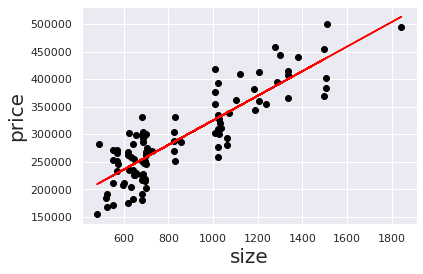

In [16]:
plt.scatter(x,y,c='black')
yhat = reg.intercept_ + reg.coef_*x_matrix
plt.plot(x, yhat, c='red', label='regression line')
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [17]:
new_data = np.array([750]).reshape(-1,1)
reg.predict(new_data)

array([269296.65874718])

In [18]:
# or using pandas dataframe...
new_data = pd.DataFrame(data=[750],columns=['size'])

new_data['price prediction'] = reg.predict(new_data)

new_data

,size,price prediction
0,750,269296.658747
